In [64]:
import matplotlib.pyplot as plt
from Bio import SeqIO
import numpy as np

#global variables
ShortSeqLen = 6

In [65]:
def AllPossibleKmars(k):
    '''Provides a list of all possible kmars'''
    lst = ['A', 'G','T','C']
    for j in range(k-1):
        lst = lst* 4
        for i in range(0,int(len(lst)/4)):
            lst[i]+='A'
        for i in range(int(len(lst)/4),int(len(lst)/2)):
            lst[i]+='G'
        for i in range(int(len(lst)/2),int(3*len(lst)/4)):
            lst[i]+='T'
        for i in range(int(3*len(lst)/4),int(len(lst))):
            lst[i]+='C'
    return lst

In [66]:
localdistributions = dict()
for kmer in AllPossibleKmars(ShortSeqLen):
    localdistributions[kmer] = dict()
    for i in range(-1000,0,1):
        localdistributions[kmer][i] = 0

In [67]:
fasta_sequences = SeqIO.parse(open('IRGSP-1.0_1kb-upstream_2021-11-11.fasta'),'fasta')
for fasta in fasta_sequences:
    name, promoter = fasta.id, str(fasta.seq)
    # got each promoter
    for i in range (-1000,0-ShortSeqLen+1,1):
        ShortSeq = promoter[1000+i: 1000+i+ShortSeqLen]
        ShortSeq = ShortSeq.upper()
        #print(i,ShortSeq,end='\n ')
        if ShortSeq in localdistributions:
            localdistributions[ShortSeq][i] += 1
        #else:
            #print('ShortSeq is not found in Local Distribution Dictionary')
    

In [68]:
localdistributions_windowed = dict()

for kmer in AllPossibleKmars(ShortSeqLen):
    localdistributions_windowed[kmer] = dict()
    for i in range(-1000+7,0,15):
        sum = 0
        for j in range(i-7,i+8,1):
            if j == -5:
                break
            sum+= localdistributions[kmer][j]
        localdistributions_windowed[kmer][i] = sum/15

(0.0, 80.0)

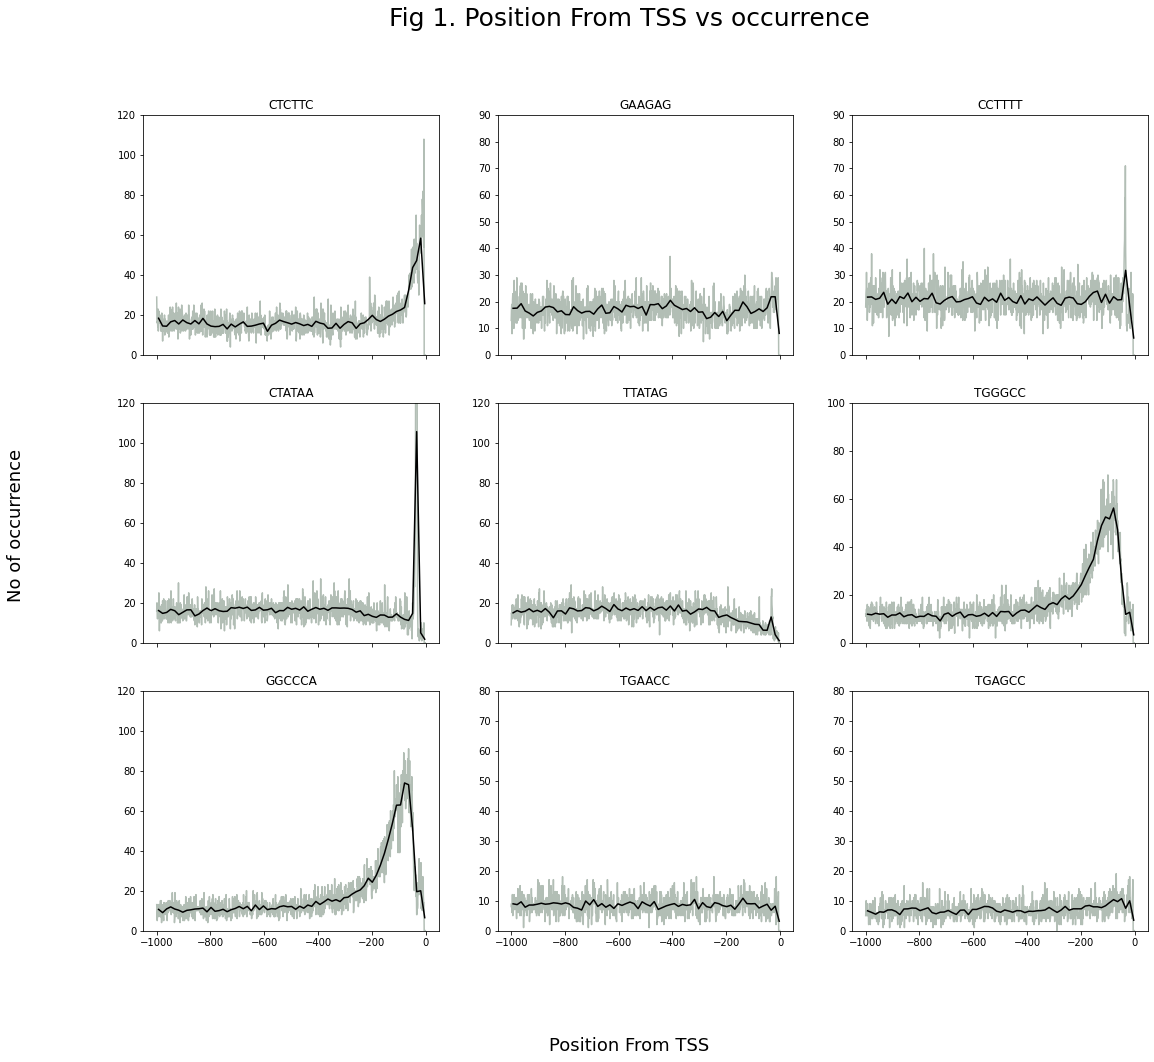

In [69]:
fig, ax = plt.subplots(3,3,sharex=True,figsize=(18, 15))
fig.suptitle("Fig 1. Position From TSS vs occurrence",fontsize=25)
fig.supxlabel('Position From TSS',fontsize=18)
fig.supylabel('No of occurrence',fontsize=18)

ax[0][0].plot(localdistributions['CTCTTC'].keys(),localdistributions['CTCTTC'].values(),color='#B2BEB5')
ax[0][0].plot(localdistributions_windowed['CTCTTC'].keys(),localdistributions_windowed['CTCTTC'].values(),color='#000')
ax[0][0].set_title('CTCTTC')
ax[0][0].set_ylim([0,120])

ax[0][1].plot(localdistributions['GAAGAG'].keys(),localdistributions['GAAGAG'].values(),color="#B2BEB5")
ax[0][1].plot(localdistributions_windowed['GAAGAG'].keys(),localdistributions_windowed['GAAGAG'].values(),color="#000")
ax[0][1].set_title('GAAGAG')
ax[0][1].set_ylim([0,90])

ax[0][2].plot(localdistributions['CCTTTT'].keys(),localdistributions['CCTTTT'].values(),color="#B2BEB5")
ax[0][2].plot(localdistributions_windowed['CCTTTT'].keys(),localdistributions_windowed['CCTTTT'].values(),color="#000")
ax[0][2].set_title('CCTTTT')
ax[0][2].set_ylim([0,90])

ax[1][0].plot(localdistributions['CTATAA'].keys(),localdistributions['CTATAA'].values(),color="#B2BEB5")
ax[1][0].plot(localdistributions_windowed['CTATAA'].keys(),localdistributions_windowed['CTATAA'].values(),color="#000")
ax[1][0].set_title('CTATAA')
ax[1][0].set_ylim([0,120])

ax[1][1].plot(localdistributions['TTATAG'].keys(),localdistributions['TTATAG'].values(),color="#B2BEB5")
ax[1][1].plot(localdistributions_windowed['TTATAG'].keys(),localdistributions_windowed['TTATAG'].values(),color="#000")
ax[1][1].set_title('TTATAG')
ax[1][1].set_ylim([0,120])

ax[1][2].plot(localdistributions['TGGGCC'].keys(),localdistributions['TGGGCC'].values(),color="#B2BEB5")
ax[1][2].plot(localdistributions_windowed['TGGGCC'].keys(),localdistributions_windowed['TGGGCC'].values(),color="#000")
ax[1][2].set_title('TGGGCC')
ax[1][2].set_ylim([0,100])

ax[2][0].plot(localdistributions['GGCCCA'].keys(),localdistributions['GGCCCA'].values(),color="#B2BEB5")
ax[2][0].plot(localdistributions_windowed['GGCCCA'].keys(),localdistributions_windowed['GGCCCA'].values(),color="#000")
ax[2][0].set_title('GGCCCA')
ax[2][0].set_ylim([0,120])

ax[2][1].plot(localdistributions['TGAACC'].keys(),localdistributions['TGAACC'].values(),color="#B2BEB5")
ax[2][1].plot(localdistributions_windowed['TGAACC'].keys(),localdistributions_windowed['TGAACC'].values(),color="#000")
ax[2][1].set_title('TGAACC')
ax[2][1].set_ylim([0,80])

ax[2][2].plot(localdistributions['TGAGCC'].keys(),localdistributions['TGAGCC'].values(),color="#B2BEB5")
ax[2][2].plot(localdistributions_windowed['TGAGCC'].keys(),localdistributions_windowed['TGAGCC'].values(),color="#000")
ax[2][2].set_title('TGAGCC')
ax[2][2].set_ylim([0,80])


Peak height:  144.66666666666666 Peak Position:  -18
Peak_l -273 peak_r -18 Peak Width 270
Relative Peak Hight = 5.3024805627545355
total area = 9527.166666666668 
Peak area = 7129.121212121213 
grey area = 691.7121212121215
Relative Peak Area = 0.7482939536540643
Peak Area / Basal Flactuation = 0.0381721699356904


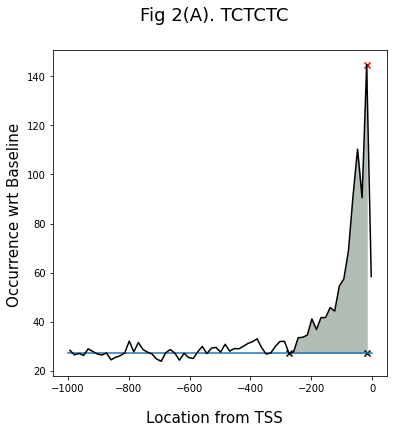

In [93]:
def PeakAnalysis(ShortSeq, showPlot = False):
    #finding base
    base = 0
    for i in range(-993,-499,15):       # upto -498
        base += localdistributions_windowed[ShortSeq][i]
    base/=33

    peak_height = 0
    peak_position = ''

    for i in range(-993,0-ShortSeqLen,15):
        if localdistributions_windowed[ShortSeq][i] > peak_height:
            peak_height = localdistributions_windowed[ShortSeq][i]
            peak_position = i
    
    print('Peak height: ',peak_height,'Peak Position: ',peak_position)
    
    peak_r = peak_position
    while localdistributions_windowed[ShortSeq][peak_r] > base and peak_r + 15 < 0-ShortSeqLen:
        peak_r += 15
    
    peak_l = peak_position
    while localdistributions_windowed[ShortSeq][peak_l] > base and peak_l-15 > -1000:
        peak_l -= 15
    
    peak_width = abs(peak_r - peak_l + 15)
    print('Peak_l',peak_l,'peak_r',peak_r, 'Peak Width', peak_width)

    peak_elements_x = list()
    for i in range(peak_l, peak_r+1, 15):
        peak_elements_x.append(i)
    
    peak_elements_y = list()
    for i in peak_elements_x:
        peak_elements_y.append(localdistributions_windowed[ShortSeq][i])
    
    if showPlot:
        fig, ax = plt.subplots(figsize=(6, 6))
        fig.suptitle('Fig 2(A). '+ShortSeq,fontsize=18)
        fig.supxlabel("Location from TSS",fontsize=15)
        fig.supylabel("Occurrence wrt Baseline",fontsize=15)
        ax.plot([-1000,0],[base,base])
        ax.plot(localdistributions_windowed[ShortSeq].keys(),localdistributions_windowed[ShortSeq].values(),color="#000")
        ax.fill_between(np.array(peak_elements_x),base,peak_elements_y,color='#B2BEB5')
        ax.scatter(peak_position,peak_height,c = 'red',marker='x')
        ax.scatter(peak_l,base,color = 'black',marker = 'x')
        ax.scatter(peak_r,base,color = 'black',marker = 'x')

    print('Relative Peak Hight =',peak_height/base)
    peak_std = np.std(peak_elements_y)
    
    
    total_area = 0
    for i in range(-993,0-ShortSeqLen,15):
        total_area += (abs(localdistributions_windowed[ShortSeq][i]-base)+abs(localdistributions_windowed[ShortSeq][i+15]-base))*0.5
    total_area*=15

    grey_area = 0
    for i in range(-993,-500,15):
        grey_area += (abs(localdistributions_windowed[ShortSeq][i]-base)+abs(localdistributions_windowed[ShortSeq][i+15]-base))*0.5
    grey_area*=15
    
    peak_area =0
    for i in range(peak_l,peak_r-15+1,15):
        peak_area += (abs(localdistributions_windowed[ShortSeq][i]-base)+abs(localdistributions_windowed[ShortSeq][i+15]-base))*0.5
    peak_area*=15

    print('total area =',total_area, '\nPeak area =',peak_area, '\ngrey area =',grey_area)
    print('Relative Peak Area =',peak_area / total_area)
    print('Peak Area / Basal Flactuation =', peak_area/(grey_area*peak_width))

PeakAnalysis('TCTCTC',True)

In [84]:
def PABFandPeakPosition_windowed(ShortSeq):
    #finding base
    base = 0
    for i in range(-993,-499,15):       # upto -498
        base += localdistributions_windowed[ShortSeq][i]
    base/=33

    peak_height = 0
    peak_position = ''

    for i in range(-993,0-ShortSeqLen,15):
        if localdistributions_windowed[ShortSeq][i] > peak_height:
            peak_height = localdistributions_windowed[ShortSeq][i]
            peak_position = i
    
    #print('Peak height: ',peak_height,'Peak Position: ',peak_position)
    
    peak_r = peak_position
    while localdistributions_windowed[ShortSeq][peak_r] > base and peak_r + 15 < 0-ShortSeqLen:
        peak_r += 15
    
    peak_l = peak_position
    while localdistributions_windowed[ShortSeq][peak_l] > base and peak_l-15 > -1000:
        peak_l -= 15
    
    
    peak_width = abs(peak_r - peak_l)
    #print('Peak_l',peak_l,'peak_r',peak_r, 'Peak Width', peak_width)

    peak_elements_x = list()
    for i in range(peak_l, peak_r+1, 15):
        peak_elements_x.append(i)
    
    peak_elements_y = list()
    for i in peak_elements_x:
        peak_elements_y.append(localdistributions_windowed[ShortSeq][i])

    #print('Relative Peak Hight =',peak_height/base)
    peak_std = np.std(peak_elements_y)
    
    
    total_area = 0
    for i in range(-993,0-ShortSeqLen,15):
        total_area += (abs(localdistributions_windowed[ShortSeq][i]-base)+abs(localdistributions_windowed[ShortSeq][i+15]-base))*0.5
    total_area*=15

    grey_area = 0
    for i in range(-993,-500,15):
        grey_area += (abs(localdistributions_windowed[ShortSeq][i]-base)+abs(localdistributions_windowed[ShortSeq][i+15]-base))*0.5
    grey_area*=15
    
    peak_area =0
    for i in range(peak_l,peak_r-15+1,15):
        peak_area += (abs(localdistributions_windowed[ShortSeq][i]-base)+abs(localdistributions_windowed[ShortSeq][i+15]-base))*0.5
    peak_area*=15

    #print('total area =',total_area, '\nPeak area =',peak_area, '\ngrey area =',grey_area)
    #print('Relative Peak Area =',peak_area / total_area)
    #print('Peak Area / Basal Flactuation =', peak_area/(grey_area*peak_width))
    return peak_area/(grey_area*peak_width), peak_position

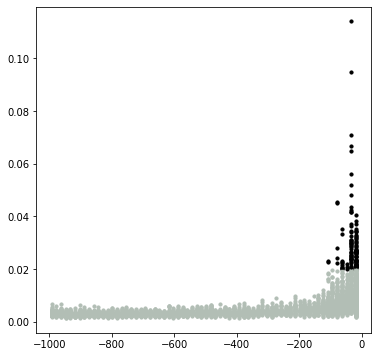

In [85]:
fig, ax = plt.subplots(figsize=(6, 6))
for ShortSeq in AllPossibleKmars(ShortSeqLen):
    PAbyBF,PeakPosition = PABFandPeakPosition_windowed(ShortSeq)
    if PAbyBF >= 0.02:
        ax.scatter(PeakPosition,PAbyBF,color='#000',s=10)
    else:
        ax.scatter(PeakPosition,PAbyBF,color='#B2BEB5',s=10)

    

In [88]:
def PABFandPeakPosition_exact(ShortSeq):
    #finding base
    base = 0
    for i in range(-993,-499,15):       # upto -498
        base += localdistributions_windowed[ShortSeq][i]
    base/=33
    #exact calculation
    exact_peak_height = 0
    exact_peak_position = ''

    for i in range(-1000,0-ShortSeqLen,1):
        if localdistributions[ShortSeq][i] > exact_peak_height:
            exact_peak_height = localdistributions[ShortSeq][i]
            exact_peak_position = i
    
    #print('Peak height: ',peak_height,'Peak Position: ',peak_position)
    
    peak_r = exact_peak_position
    while localdistributions[ShortSeq][peak_r] > base and peak_r + 1 < 0-ShortSeqLen:
        peak_r += 1
    
    peak_l = exact_peak_position
    while localdistributions[ShortSeq][peak_l] > base and peak_l-1 > -1000:
        peak_l -= 1
    
    
    exact_peak_width = abs(peak_r - peak_l)

    #approximate calculation
    peak_height = 0
    peak_position = ''

    for i in range(-993,0-ShortSeqLen,15):
        if localdistributions_windowed[ShortSeq][i] > peak_height:
            peak_height = localdistributions_windowed[ShortSeq][i]
            peak_position = i
    
    #print('Peak height: ',peak_height,'Peak Position: ',peak_position)
    
    peak_r = peak_position
    while localdistributions_windowed[ShortSeq][peak_r] > base and peak_r + 15 < 0-ShortSeqLen:
        peak_r += 15
    
    peak_l = peak_position
    if peak_l < -1000:
        peak_l += 15
    while localdistributions_windowed[ShortSeq][peak_l] > base and peak_l-15 > -1000:
        peak_l -= 15
    
    
    peak_width = abs(peak_r - peak_l)
    #print('Peak_l',peak_l,'peak_r',peak_r, 'Peak Width', peak_width)

    peak_elements_x = list()
    for i in range(peak_l, peak_r+1, 15):
        peak_elements_x.append(i)
    
    peak_elements_y = list()
    for i in peak_elements_x:
        peak_elements_y.append(localdistributions_windowed[ShortSeq][i])

    #print('Relative Peak Hight =',peak_height/base)
    peak_std = np.std(peak_elements_y)
    
    
    total_area = 0
    for i in range(-993,0-ShortSeqLen,15):
        total_area += (abs(localdistributions_windowed[ShortSeq][i]-base)+abs(localdistributions_windowed[ShortSeq][i+15]-base))*0.5
    total_area*=15

    grey_area = 0
    for i in range(-993,-500,15):
        grey_area += (abs(localdistributions_windowed[ShortSeq][i]-base)+abs(localdistributions_windowed[ShortSeq][i+15]-base))*0.5
    grey_area*=15
    
    peak_area =0
    for i in range(peak_l,peak_r-15+1,15):
        peak_area += (abs(localdistributions_windowed[ShortSeq][i]-base)+abs(localdistributions_windowed[ShortSeq][i+15]-base))*0.5
    peak_area*=15

    #print('total area =',total_area, '\nPeak area =',peak_area, '\ngrey area =',grey_area)
    #print('Relative Peak Area =',peak_area / total_area)
    #print('Peak Area / Basal Flactuation =', peak_area/(grey_area*peak_width))
    return peak_area/(grey_area*peak_width), exact_peak_position

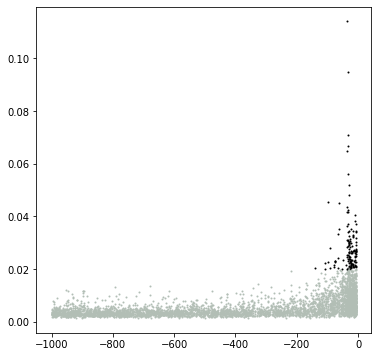

In [90]:
fig, ax = plt.subplots(figsize=(6, 6))
for ShortSeq in AllPossibleKmars(ShortSeqLen):
    PAbyBF,PeakPosition = PABFandPeakPosition_exact(ShortSeq)
    if PAbyBF >= 0.02:
        ax.scatter(PeakPosition,PAbyBF,color='#000',s=1)
    else:
        ax.scatter(PeakPosition,PAbyBF,color='#B2BEB5',s=1)

    